<a href="https://colab.research.google.com/github/isuruK2003/MNISTDigitClassfication_Multinomial/blob/main/MNIST_Digit_Classification_Multinomial_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# Vectorized probability function
def predict(x_matrix, w_matrix):
  logits = np.dot(x_matrix, w_matrix.T)  # Compute all logits at once
  logits -= np.max(logits, axis=1, keepdims=True)  # Stability trick
  exp_logits = np.exp(logits)
  return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)  # Softmax

In [ ]:
# Vectorized cost function with log-sum-exp trick
def cost(y_array, x_matrix, w_matrix):
  N = len(y_array)
  logits = np.dot(x_matrix, w_matrix.T)
  logits -= np.max(logits, axis=1, keepdims=True)  # Stability trick
  exp_logits = np.exp(logits)
  probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)  # Softmax

  # Create one-hot encoded matrix for the correct labels
  y_one_hot = np.zeros_like(probs)
  y_one_hot[np.arange(N), y_array] = 1

  # Calculate the negative log likelihood
  log_likelihoods = -np.log(np.clip(probs[np.arange(N), y_array], 1e-15, 1 - 1e-15))
  return np.sum(log_likelihoods) / N

In [ ]:
# Vectorized gradient descent function
def gradient_descent(y_array, x_matrix, w_matrix, learning_rate):
  N = len(y_array)
  logits = np.dot(x_matrix, w_matrix.T)
  logits -= np.max(logits, axis=1, keepdims=True)  # Stability trick
  exp_logits = np.exp(logits)
  probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)  # Softmax

  # Create one-hot encoded matrix for the correct labels
  y_one_hot = np.zeros_like(probs)
  y_one_hot[np.arange(N), y_array] = 1

  # Calculate gradients
  gradient = np.dot((probs - y_one_hot).T, x_matrix) / N

  # Update weights
  return w_matrix - learning_rate * gradient

In [ ]:
# Load and prepare the data
df = pd.read_csv("/content/sample_data/mnist_test.csv", index_col=False)

In [ ]:
# Extract labels and features
y_array = df.iloc[:, 0].to_numpy()
x_matrix = df.iloc[:, 1:].to_numpy()

In [ ]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_matrix, y_array, test_size=0.2, random_state=42)

In [ ]:
# Scale the data
scaler = StandardScaler(with_mean=False)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Predictions and accuracy
def predict_class(x_matrix, w_matrix):
  return np.argmax(predict(x_matrix, w_matrix), axis=1)

Iteration 0: Cost = 2.330954959315775
Iteration 100: Cost = 0.28738650817161504
Iteration 200: Cost = 0.23832973038623567
Iteration 300: Cost = 0.21359571202594524
Iteration 400: Cost = 0.1972653287664141
Iteration 500: Cost = 0.18513184193164733
Iteration 600: Cost = 0.17549718457849536
Iteration 700: Cost = 0.16751673306958492
Iteration 800: Cost = 0.16071251043033297
Iteration 900: Cost = 0.15478790891398073
Train Accuracy: 95.95%
Test Accuracy: 92.25%


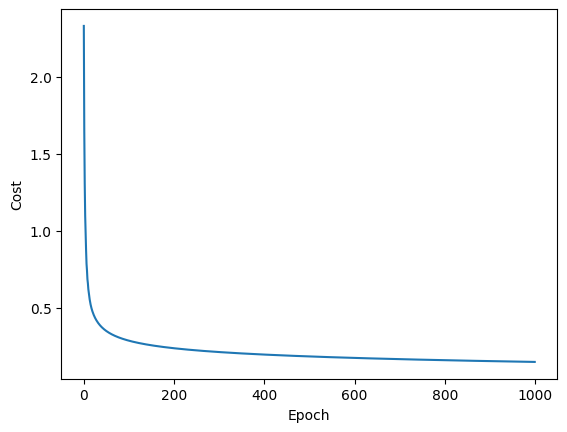

In [ ]:
# Initialize weights with small random values
w_matrix = np.random.randn(10, x_train.shape[1]) * 0.01

# Training loop
learning_rate = 0.1
epochs = 1000

cost_vals = []

for i in range(epochs):
  cost_val = cost(y_train, x_train, w_matrix)
  cost_vals.append(cost_val)
  if i % 100 == 0:
    print(f"Iteration {i}: Cost = {cost_val}")
  w_matrix = gradient_descent(y_train, x_train, w_matrix, learning_rate)

# Plotting Cost Vs. Epoch
plt.plot(range(epochs), cost_vals)
plt.xlabel("Epoch")
plt.ylabel("Cost")

# Calculating accuracy
y_train_pred = predict_class(x_train, w_matrix)
y_test_pred = predict_class(x_test, w_matrix)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
import os
from PIL import Image, ImageOps

def get_img_data(filepath, size=(28, 28)):
  img_obj = Image.open(filepath)
  img_obj = img_obj.resize(size)
  img_obj = ImageOps.grayscale(img_obj)
  img_data = np.array(img_obj).flatten()
  if np.mean(img_data) > 128:
    img_data = 255 - img_data
  return np.array([img_data])

def display_image(img_data):
  char_map = " .;%#&$@"
  image_data = img_data[0]
  max_pixel_val = max(image_data)

  for i in range(len(image_data)):
    pixel_val = image_data[i]
    char_index = int((pixel_val / max_pixel_val) * (len(char_map) - 1))
    char = char_map[char_index]
    end = "\n" if (i + 1) % 28 == 0 else " "
    print(char, end=end)


In [ ]:
sample_images_folder = "/content/drive/MyDrive/Colab Notebooks/Logistic Regression Practice/MNIST Digit Classification - Multinomial/sample_images/"
sample_images = os.listdir(sample_images_folder)

for filename in sample_images:
  print("-" * 56)
  filepath = f"{sample_images_folder}/{filename}"
  img_data = get_img_data(filepath)
  prediction = predict_class(img_data, w_matrix)
  print(f"Prediction: {prediction[0]}")
  display_image(img_data)

--------------------------------------------------------
Prediction: 5
                                                       
                                                       
                                                       
                    . $ $ ;                            
                . $ @ @ @ $                            
            . $ @ @ @ @ @ @                            
            $ @ @ @ @ @ @ @                            
            % @ @ @ $ @ @ @                            
                    $ @ @ #                            
                    @ @ @                              
                    @ @ @                              
                    @ @ @                              
                  ; @ @ @                              
                  $ @ @ #                              
                  @ @ @                                
                  @ @ @                                
                  @ @ @          